## Lab 6: Cubic Splines

Cubic spline interpolation is a piecewise polynomial interpolation method that ensures smoothness and continuity. It uses cubic polynomials in each interval $[x_i, x_{i+1}]$, ensuring that the spline and its first and second derivatives are continuous.

### Key Steps in Computing Cubic Splines

1. **Cubic Polynomial Form**:
   Each interval $[x_i, x_{i+1}]$ is represented by:
   $$
   S_i(x) = a_i + b_i(x - x_i) + c_i(x - x_i)^2 + d_i(x - x_i)^3
   $$

2. **Conditions**:
   - Interpolation: The spline passes through the given points ($S_i(x_i) = y_i$ and $S_i(x_{i+1}) = y_{i+1}$).
   - Continuity: The first and second derivatives are continuous at internal points.
   - Boundary conditions: Natural spline assumes the second derivatives at the endpoints are zero.

3. **Matrix Formulation**:
   Using the above conditions, a tridiagonal matrix system is solved to determine the coefficients.


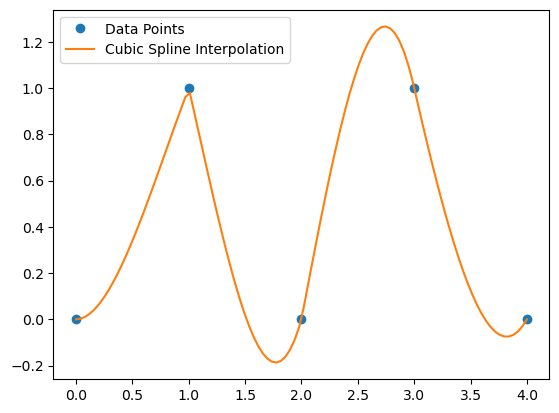

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def cubic_spline(x, y, num_points=100):
    # Number of data points
    n = len(x)
    
    # Step 1: Calculate the spline coefficients
    h = np.diff(x)
    alpha = (3 / h[1:]) * (y[2:] - y[1:-1]) - (3 / h[:-1]) * (y[1:-1] - y[:-2])

    # Solve the system of linear equations for the second derivatives (spline coefficients)
    A = np.zeros((n, n))
    b = np.zeros(n)
    
    A[0, 0] = 1
    A[-1, -1] = 1
    for i in range(1, n - 1):
        A[i, i - 1] = h[i - 1]
        A[i, i] = 2 * (h[i - 1] + h[i])
        A[i, i + 1] = h[i]
        b[i] = alpha[i - 1]
    
    M = np.linalg.solve(A, b)

    # Step 2: Calculate the spline coefficients
    spline_coeffs = []
    for i in range(n - 1):
        a = (M[i+1] - M[i]) / (3 * h[i])
        b = (y[i+1] - y[i]) / h[i] - h[i] * (2 * M[i] + M[i+1]) / 3
        c = M[i]
        d = y[i]
        spline_coeffs.append((a, b, c, d))

    # Step 3: Interpolate and evaluate the spline
    x_new = np.linspace(x[0], x[-1], num_points)
    y_new = np.zeros_like(x_new)

    for j, xi in enumerate(x_new):
        for i in range(n - 1):
            if x[i] <= xi < x[i + 1]:
                a, b, c, d = spline_coeffs[i]
                dx = xi - x[i]
                y_new[j] = a * dx**3 + b * dx**2 + c * dx + d
                break

    return x_new, y_new

# Example usage
x = np.array([0, 1, 2, 3, 4])
y = np.array([0, 1, 0, 1, 0])

x_new, y_new = cubic_spline(x, y)

# Plot the result
plt.plot(x, y, 'o', label='Data Points')
plt.plot(x_new, y_new, label='Cubic Spline Interpolation')
plt.legend()
plt.show()
